In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
# this data is not binary class classification data this is multi class classification data(from pandas profiling we will get to know clearly)(target column is having more than 2 classifications) 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
from pandas_profiling import ProfileReport

In [6]:
# EDA
prof_rep = ProfileReport(df, title = "Pandas profiling report")

In [7]:
prof_rep.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

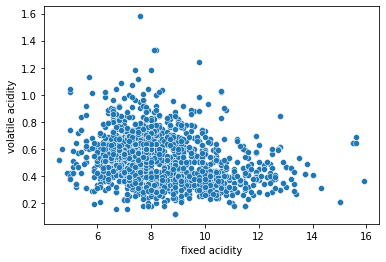

In [8]:
# In profileReport they hava given scatter plot in different style that is why here im using seaborn to plot the scatter plot
import seaborn as sns
sns.scatterplot(data = df, x = 'fixed acidity', y = 'volatile acidity')

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

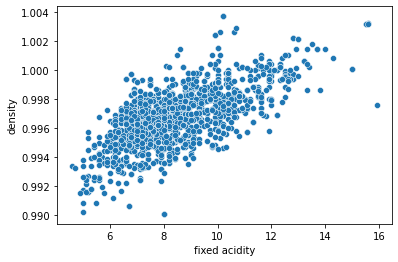

In [9]:
sns.scatterplot(data = df, x = 'fixed acidity', y = 'density')

In [10]:
# our data is having the values which are differ a lot in magnitute, that values should be in same scale, to do that we are using standardscaler
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
new_data = sclr.fit_transform(df.drop(labels=['quality'], axis = 1))

In [11]:
new_data

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [12]:
prof_rep_scld = ProfileReport(new_data, title = 'pandas profiling report')
prof_rep_scld.to_widgets()

TypeError: type of argument "df" must be one of (pandas.core.frame.DataFrame, NoneType); got numpy.ndarray instead

In [13]:
scaled_data = pd.DataFrame(new_data)

In [14]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
scaled_data_df = pd.DataFrame(new_data, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [17]:
scaled_data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [18]:
prof_rep_scld = ProfileReport(scaled_data_df, title = 'pandas profiling report')
prof_rep_scld.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# from above profiling we can say this standard scaling will not effect the ouliers which are present in our data
# when ever our data is having the outlier we will use the minmaxscaer or robust scaler which are robust to outlier bcz it is using median instead of mean

from sklearn.preprocessing import RobustScaler
new_data_rbsclr = RobustScaler().fit_transform(df.drop(labels=['quality'], axis = 1))

In [20]:
new_data_rbsclr

array([[-0.23809524,  0.72      , -0.78787879, ...,  1.05263158,
        -0.33333333, -0.5       ],
       [-0.04761905,  1.44      , -0.78787879, ..., -0.57894737,
         0.33333333, -0.25      ],
       [-0.04761905,  0.96      , -0.66666667, ..., -0.26315789,
         0.16666667, -0.25      ],
       ...,
       [-0.76190476, -0.04      , -0.39393939, ...,  0.57894737,
         0.72222222,  0.5       ],
       [-0.95238095,  0.5       , -0.42424242, ...,  1.36842105,
         0.5       ,  0.        ],
       [-0.9047619 , -0.84      ,  0.63636364, ...,  0.42105263,
         0.22222222,  0.5       ]])

In [21]:
rbscaled_data_df = pd.DataFrame(new_data_rbsclr, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [22]:
prof_rep_rbscld = ProfileReport(rbscaled_data_df, title = 'pandas profiling report')
prof_rep_rbscld.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
scaled_data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [26]:
rbscaled_data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50


In [27]:
x = rbscaled_data_df
y =df['quality']

In [28]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50


In [29]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.35,random_state=42)

In [31]:
from sklearn.svm import SVC

In [32]:
svc_model = SVC()

In [33]:
svc_model.fit(x_train, y_train)

SVC()

In [34]:
svc_model.predict(x_test)

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 6, 7, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 5, 6,
       5, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 6, 6, 6, 5,

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, svc_model.predict(x_test))

0.6035714285714285

In [37]:
# accuracy of the model is quite low, we need to implement the grid search approach to optimize the parameters to give the best accuracy

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameters = {'C' : [1,3,5,7,9], 'kernel' : ('linear', 'rbf'), 'gamma' : [1,0.5,0.1,0.01,0.001]}
svc_grid = GridSearchCV(SVC(), parameters)

In [40]:
svc_grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 3, 5, 7, 9],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001],
                         'kernel': ('linear', 'rbf')})

In [41]:
svc_grid.best_params_

{'C': 3, 'gamma': 0.5, 'kernel': 'rbf'}

In [42]:
svc_grid_model = SVC(C= 3, kernel= 'rbf', gamma = 0.5)

In [43]:
svc_grid_model.fit(x_train, y_train)

SVC(C=3, gamma=0.5)

In [44]:
svc_grid_model.predict(x_test)

array([6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 5, 6, 5, 5, 7, 5, 5, 7, 5, 5, 6,
       5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6,
       7, 5, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 5, 7, 5, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 4, 7, 6, 7, 6,
       6, 5, 5, 5, 4, 7, 5, 6, 5, 6, 6, 6, 7, 6, 5, 6, 5, 6, 5, 5, 4, 5,
       5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 7, 5, 8, 5, 5, 6, 7, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 5, 7, 6, 5, 6, 5, 6, 6, 5, 6, 5,
       6, 7, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6,
       6, 7, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 5, 7,
       5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 5,

In [45]:
accuracy_score(y_test, svc_grid_model.predict(x_test))

0.6321428571428571

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train, y_train)

C:\Users\KARISHMA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
lr.predict(x_test)

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5,
       7, 5, 6, 5, 7, 5, 6, 6, 6, 5, 7, 6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       7, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 7, 5,

In [48]:
accuracy_score(y_test, lr.predict(x_test))

0.5696428571428571

In [49]:
# from above observations we can say gridSearchCV is giving good accuracy to improve the accuracy we have to perform more feature engineering and hyper parameter tuning